In [ ]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

In [ ]:
RANGE_CONST = 5
NIVEIS_RECURSAO = 2
terminais = ["+", "-", "*", "/", "SafeMath.log", "SafeMath.sqrt", "SafeMath.pow2", "SafeMath.inv", "(", ")"] \
            + [str(i) for i in range(1, RANGE_CONST)] \
            + [f"dx[{i}]" for i in range(n_features)]
naoterminais = ["<S>", "<E>", "<OP>", "<POP>", "<VAR>", "<CONST>"] + [f"<E_{i}>" for i in range(NIVEIS_RECURSAO)]
gramatica = {
    "<S>" : [["<E>"]],
    "<OP>" : [["+"], ["-"], ["*"]],
    "<E>" : [["<E_0>", "<OP>", "<E_0>"], ["<POP>", "(", "<E_0>", ")"], ["<VAR>"]],
    "<POP>" : [["SafeMath.log"], ["SafeMath.sqrt"], ["SafeMath.pow2"], ["SafeMath.inv"], ["<CONST>", "*"]],
    "<CONST>" : [[str(i)] for i in range(1, RANGE_CONST)],
    "<VAR>" : [[f"dx[{i}]"]  for i in range(n_features)]
}

In [14]:
import pandas as pd
from sklearn.metrics.cluster import v_measure_score
import random
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [15]:
dataset_name = 'breast_cancer_coimbra'
dataset_test_path = f'./data/{dataset_name}-train.csv'
dataset_train_path = f'./data/{dataset_name}-test.csv'
df_train = pd.read_csv(dataset_train_path)
df_test = pd.read_csv(dataset_test_path)

X_train = df_train.drop(columns=['Classification']).to_numpy()
y_train = df_train['Classification'].to_numpy()
X_test = df_test.drop(columns=['Classification']).to_numpy()
y_test = df_test['Classification'].to_numpy()

n_features = X_train.shape[1]

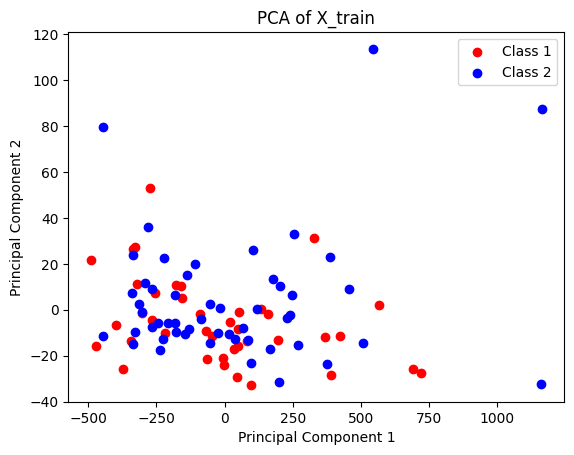

In [19]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Define colors for different labels
colors = ['red', 'blue']

# Create a scatter plot
for label in np.unique(y_test):
    indices = y_test == label
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], c=colors[label-1], label=f'Class {label}')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of X_train')

# Add a legend
plt.legend()

# Show the plot
plt.show()